In [2]:
!pip install emoji

In [3]:
#Import libraries
import pandas as pd
import re
from google.colab import files
import emoji
import numpy


In [4]:
!pip install numpy

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
def clean_text(text):
    if pd.isna(text):
        return ""


file_path = '/content/drive/My Drive/combined_dataset_final.csv'
df = pd.read_csv(file_path)

print(f"File '{file_path}' loaded successfully. First 5 rows:")
display(df.head())

File '/content/drive/My Drive/combined_dataset_final.csv' loaded successfully. First 5 rows:


,tweet_id,party,username,name,date,time,full_text,like,retweet_count,reply_count,view_count,followers_count
0,1.73778E+18,CPN (SC),Bhanubhakta99,Bhanubhakta Joshi,12/21/2023,16:19:16,‘६०प्रतिशत विद्यार्थी स्कुल गएका छैनन्’ https:...,1,1,0,168,17
1,1.73778E+18,CPN (SC),Bhanubhakta99,Bhanubhakta Joshi,12/21/2023,16:16:43,RT @EduKhabar: सामुदायिक विद्यालयमा १० वर्ष पढ...,0,4,0,0,17
2,1.5313E+18,CPN (SC),Krishnacpnus,Krishna Kumar Shrestha,5/30/2022,21:35:49,https://t.co/yNDAB7elEU,1,0,1,0,69
3,1.5313E+18,CPN (SC),Krishnacpnus,Krishna Kumar Shrestha,5/30/2022,21:34:18,https://t.co/g97kWpTdnn,0,0,0,0,69
4,1.5313E+18,CPN (SC),Krishnacpnus,Krishna Kumar Shrestha,5/30/2022,21:34:07,https://t.co/C3eLyMYI9J,0,0,0,0,69


/tmp/ipython-input-3444683659.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M').size().plot(kind='line', marker='o', color='teal')


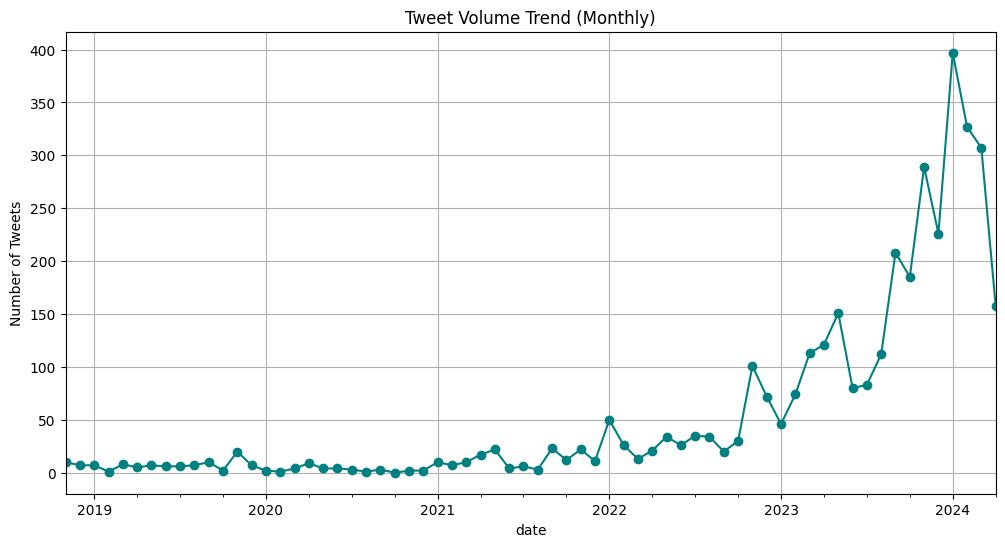

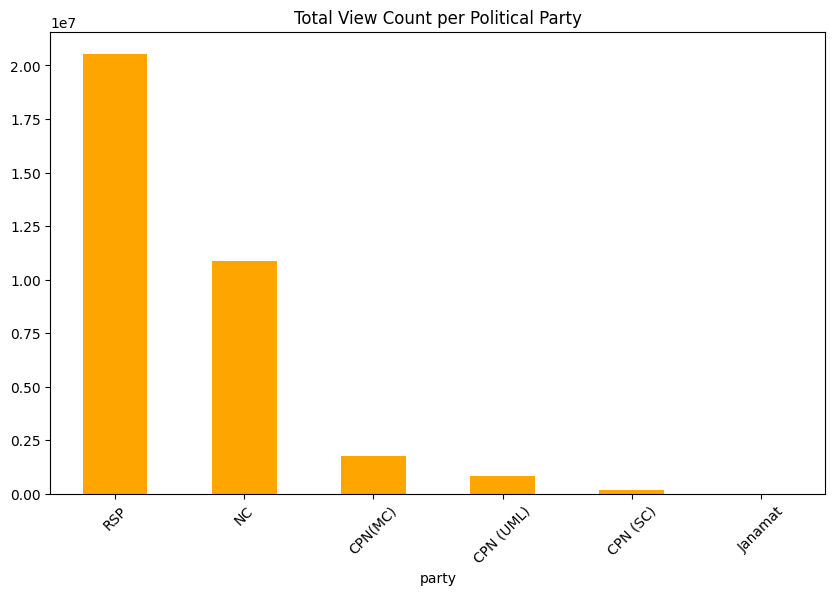

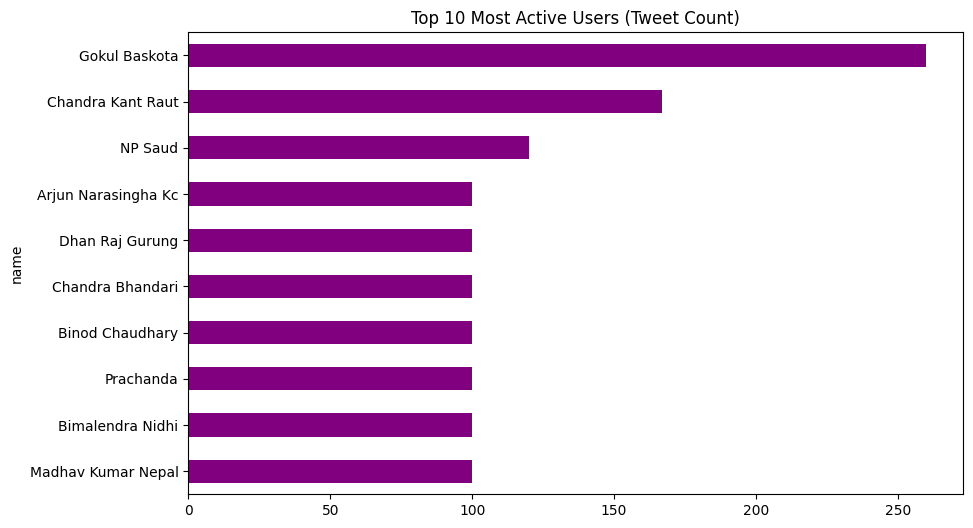

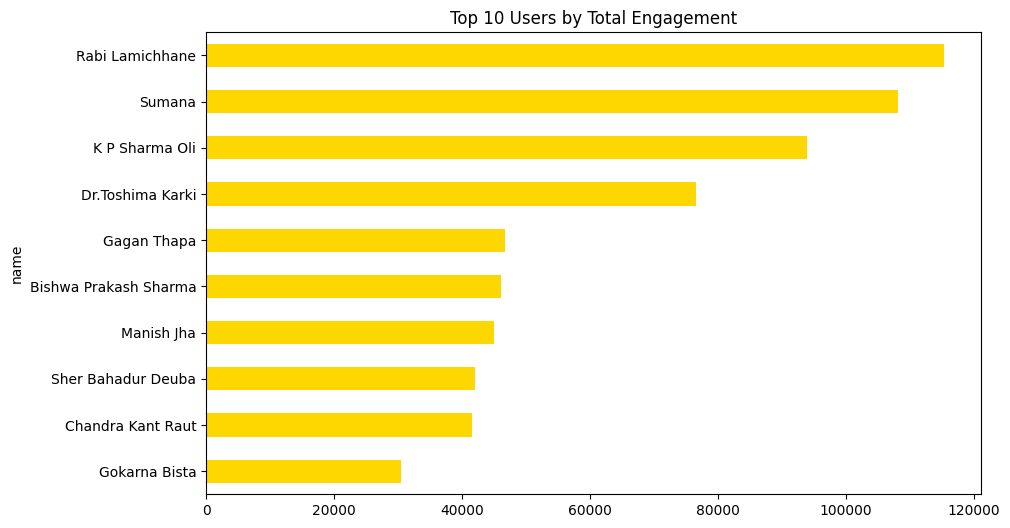

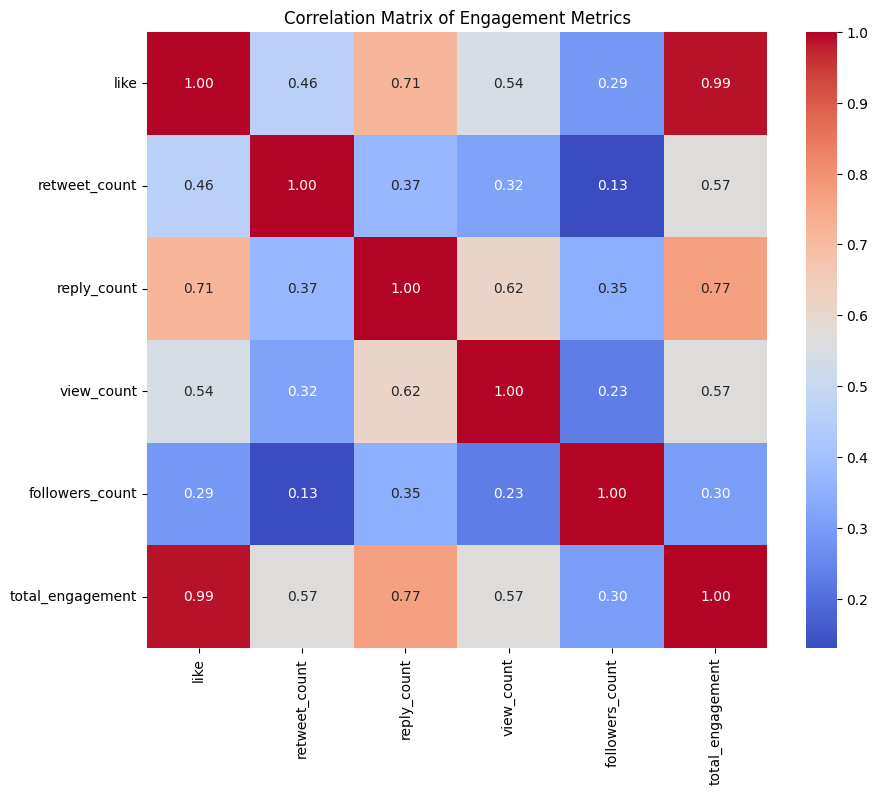

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/drive/My Drive/combined_dataset_final.csv')

# Preprocessing
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['total_engagement'] = df['like'] + df['retweet_count'] + df['reply_count']

# 1. Monthly Tweet Trend
plt.figure(figsize=(12, 6))
df.set_index('date').resample('M').size().plot(kind='line', marker='o', color='teal')
plt.title('Tweet Volume Trend (Monthly)')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.savefig('tweet_trend_monthly.png')

# 2. Total Views per Party
plt.figure(figsize=(10, 6))
df.groupby('party')['view_count'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total View Count per Political Party')
plt.xticks(rotation=45)
plt.savefig('views_per_party.png')

# 3. Top 10 Most Active Users
plt.figure(figsize=(10, 6))
df['name'].value_counts().head(10).plot(kind='barh', color='purple').invert_yaxis()
plt.title('Top 10 Most Active Users (Tweet Count)')
plt.savefig('top_active_users.png')

# 4. Top 10 Users by Total Engagement
plt.figure(figsize=(10, 6))
df.groupby('name')['total_engagement'].sum().sort_values(ascending=False).head(10).plot(kind='barh', color='gold').invert_yaxis()
plt.title('Top 10 Users by Total Engagement')
plt.savefig('top_engaged_users.png')

# 5. Engagement Correlation Matrix
corr_cols = ['like', 'retweet_count', 'reply_count', 'view_count', 'followers_count', 'total_engagement']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engagement Metrics')
plt.savefig('engagement_correlation.png')

In [10]:
# Function to clean Nepali + English tweets
def clean_text(text):
    if pd.isna(text):
        return ""

    # Ensure UTF-8 encoding
    text = str(text).encode("utf-8", "ignore").decode("utf-8")

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove user mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (# symbol)
    text = re.sub(r'#', '', text)

    # Remove ALL emojis properly using emoji library
    text = emoji.replace_emoji(text, replace='')

    # Also remove any remaining emoji-like characters
    text = re.sub(r'[\U00010000-\U0010FFFF]+', '', text)
    text = re.sub(r'[\u2600-\u26FF\u2700-\u27BF\U0001F300-\U0001F9FF]+', '', text)

    # Remove numbers (both English and Devanagari)
    text = re.sub(r'\d+', '', text)  # English numbers
    text = re.sub(r'[\u0966-\u096F]+', '', text)  # Devanagari numbers (corrected unicode range)

    # Remove only unwanted special characters (KEEP Nepali letters)
    # Devanagari range: \u0900-\u097F
    # English alphabets: A-Za-z
    text = re.sub(r'[^A-Za-z\u0900-\u097F\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Clean the full_text column
print("\nCleaning tweets...")
df['full_text_cleaned'] = df['full_text'].apply(clean_text)


Cleaning tweets...


In [11]:
# Show examples
print("\n" + "="*80)
print("CLEANING EXAMPLES:")
print("="*80)
for i in range(min(10, len(df))):
    if pd.notna(df.loc[i, 'full_text']) and str(df.loc[i, 'full_text']).strip():
        original = df.loc[i, 'full_text']
        cleaned = df.loc[i, 'full_text_cleaned']
        print(f"\n{i+1}. Original: {original[:120]}...")
        print(f"   Cleaned:  {cleaned}")
        print("-"*80)


CLEANING EXAMPLES:

1. Original: ‘६०प्रतिशत विद्यार्थी स्कुल गएका छैनन्’ https://t.co/yesegP5FAC...
   Cleaned:  प्रतिशत विद्यार्थी स्कुल गएका छैनन्
--------------------------------------------------------------------------------

2. Original: RT @EduKhabar: सामुदायिक विद्यालयमा १० वर्ष पढाएपछि स्वतः बढुवा, योग्यता, तालिम र लाइसेन्स भएका प्राथमिक तहका शिक्षकलाई ...
   Cleaned:  RT सामुदायिक विद्यालयमा वर्ष पढाएपछि स्वतः बढुवा योग्यता तालिम र लाइसेन्स भएका प्राथमिक तहका शिक्षकलाई निमावि र माविमा बढु
--------------------------------------------------------------------------------

3. Original: https://t.co/yNDAB7elEU...
   Cleaned:  
--------------------------------------------------------------------------------

4. Original: https://t.co/g97kWpTdnn...
   Cleaned:  
--------------------------------------------------------------------------------

5. Original: https://t.co/C3eLyMYI9J...
   Cleaned:  
--------------------------------------------------------------------------------

6. Or

In [12]:
# Save cleaned dataset
output_filename = 'cleaned_tweets.xlsx'
df.to_excel(output_filename, index=False)
print(f"\n✓ Cleaned dataset saved as: {output_filename}")




✓ Cleaned dataset saved as: cleaned_tweets.xlsx


In [13]:
# Download the cleaned file
print("\nDownloading cleaned file...")
files.download(output_filename)
print("✓ Download complete!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Download complete!


In [14]:
# Step 1: Install Required Libraries
print("Installing required libraries...")
!pip install transformers torch scikit-learn -q
print("✓ Installation complete!\n")

Installing required libraries...
✓ Installation complete!



In [15]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import time

In [16]:
# Filter non-empty tweets
df_filtered = df[df['full_text_cleaned'].notna() & (df['full_text_cleaned'].str.strip() != '')]
print(f"✓ Filtered to {len(df_filtered)} non-empty tweets")

✓ Filtered to 3449 non-empty tweets


In [17]:
# Step 4: Define Categories
categories = [
    "विकास र राष्ट्र निर्माण सम्बन्धी विषयवस्तु",
    "राजनीतिक विवाद र आलोचना सम्बन्धी विषयवस्तु"
]

print("\nCategories defined:")
print(f"1. {categories[0]}")
print(f"2. {categories[1]}")


Categories defined:
1. विकास र राष्ट्र निर्माण सम्बन्धी विषयवस्तु
2. राजनीतिक विवाद र आलोचना सम्बन्धी विषयवस्तु


In [18]:
# Step 5: Load Model
print("\nLoading mDeBERTa multilingual model...")
device = 0 if torch.cuda.is_available() else -1
print(f"Using: {'GPU' if device == 0 else 'CPU'}")

classifier = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7",
    device=device
)
print("✓ Model loaded successfully")


Loading mDeBERTa multilingual model...
Using: GPU


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Device set to use cuda:0


✓ Model loaded successfully


In [20]:
# Step 6: Classification Function
def classify_tweet(text):
    """Classify a tweet and return label with confidence score"""
    try:
        if pd.isna(text) or str(text).strip() == "":
            return None, 0.0

        result = classifier(str(text), candidate_labels=categories, multi_label=False)
        return result['labels'][0], result['scores'][0]

    except Exception as e:
        return None, 0.0

In [21]:
# Step 7: Classify All Tweets (OPTIMIZED)
print("\n" + "="*80)
print("AUTOMATIC CLASSIFICATION")
print("="*80)

total = len(df_filtered)
print(f"\nClassifying {total} tweets...")
print("This will take approximately:")
if device == 0:  # GPU
    estimated_time = (total * 0.2) / 60  # ~0.2 seconds per tweet on GPU
    print(f"  GPU: {estimated_time:.1f} minutes")
else:  # CPU
    estimated_time = (total * 1.0) / 60  # ~1 second per tweet on CPU
    print(f"  CPU: {estimated_time:.1f} minutes (⚠ SLOW - enable GPU!)")

predictions = []
confidences = []

start_time = time.time()
update_interval = 50  # Update progress every 50 tweets

for i, text in enumerate(df_filtered['full_text_cleaned']):
    pred, conf = classify_tweet(text)
    predictions.append(pred)
    confidences.append(conf)

    # Progress update
    if (i + 1) % update_interval == 0 or (i + 1) == total:
        elapsed = time.time() - start_time
        tweets_per_sec = (i + 1) / elapsed
        remaining = (total - (i + 1)) / tweets_per_sec if tweets_per_sec > 0 else 0
        progress = ((i + 1) / total) * 100

        print(f"Progress: {progress:.1f}% ({i+1}/{total}) | "
              f"Speed: {tweets_per_sec:.1f} tweets/s | "
              f"Time remaining: {remaining/60:.1f} min", end='\r')

total_time = time.time() - start_time
print(f"\n\n✓ Successfully classified {len(predictions)} tweets in {total_time/60:.1f} minutes")
print(f"  Average: {total/total_time:.1f} tweets/second")

# Add predictions to dataframe
df_filtered = df_filtered.copy()
df_filtered['predicted_category'] = predictions
df_filtered['confidence_score'] = confidences
df_filtered['category_label'] = df_filtered['predicted_category'].apply(
    lambda x: "Development" if x == categories[0] else "Political" if x is not None else "Unknown"
)


AUTOMATIC CLASSIFICATION

Classifying 3449 tweets...
This will take approximately:
  GPU: 11.5 minutes


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Progress: 100.0% (3449/3449) | Speed: 18.1 tweets/s | Time remaining: 0.0 min

✓ Successfully classified 3449 tweets in 3.2 minutes
  Average: 18.1 tweets/second


In [22]:
# Step 8: Show Results
print("\n" + "="*80)
print("CLASSIFICATION RESULTS")
print("="*80)

print("\nCategory Distribution:")
for cat in categories:
    count = sum(1 for p in predictions if p == cat)
    percentage = (count / len(predictions) * 100) if len(predictions) > 0 else 0
    print(f"{cat}")
    print(f"  Count: {count} ({percentage:.1f}%)")

print(f"\nAverage Confidence Scores:")
print(f"Overall: {np.mean(confidences):.3f}")
print(f"Development: {df_filtered[df_filtered['category_label']=='Development']['confidence_score'].mean():.3f}")
print(f"Political: {df_filtered[df_filtered['category_label']=='Political']['confidence_score'].mean():.3f}")


CLASSIFICATION RESULTS

Category Distribution:
विकास र राष्ट्र निर्माण सम्बन्धी विषयवस्तु
  Count: 2279 (66.1%)
राजनीतिक विवाद र आलोचना सम्बन्धी विषयवस्तु
  Count: 1170 (33.9%)

Average Confidence Scores:
Overall: 0.710
Development: 0.719
Political: 0.692


In [23]:
# Show sample predictions
print("\n" + "="*80)
print("SAMPLE PREDICTIONS")
print("="*80)

for cat_label, cat_full in [("Development", categories[0]), ("Political", categories[1])]:
    sample = df_filtered[df_filtered['category_label'] == cat_label].head(3)
    print(f"\n{cat_full}:")
    print("-"*80)
    for idx, row in sample.iterrows():
        print(f"\nText: {row['full_text_cleaned'][:120]}...")
        print(f"Confidence: {row['confidence_score']:.3f}")


SAMPLE PREDICTIONS

विकास र राष्ट्र निर्माण सम्बन्धी विषयवस्तु:
--------------------------------------------------------------------------------

Text: प्रतिशत विद्यार्थी स्कुल गएका छैनन्...
Confidence: 0.701

Text: RT सामुदायिक विद्यालयमा वर्ष पढाएपछि स्वतः बढुवा योग्यता तालिम र लाइसेन्स भएका प्राथमिक तहका शिक्षकलाई निमावि र माविमा ब...
Confidence: 0.664

Text: नेपाली बौद्धमार्गी एवं हिमाली आदिवासी शेर्पा समुदायले मनाउने ग्याल्बो ल्होसार अर्थात् नयाँ वर्ष क्षुफोताक्लोका उपलक्ष्यम...
Confidence: 0.876

राजनीतिक विवाद र आलोचना सम्बन्धी विषयवस्तु:
--------------------------------------------------------------------------------

Text: RT श्रममन्त्री कृष्णकुमार श्रेष्ठको अपील...
Confidence: 0.578

Text: RT वैदेशिक रोजगारीको नाममा ठगीमा परे मलाई फोन गर्नुस् श्रममन्त्री श्रेष्ठ Video...
Confidence: 0.658

Text: नेपालकतार संयुक्त समितिको बैठकपछि सहमतिपत्र आदानप्रदान गरिंदै बैठकमा सन् मा भएको श्रम सम्झौता पुनरावलोकन गर्ने लगायता वि...
Confidence: 0.521


In [24]:
# Step 9: Create Validation Labels
print("\n" + "="*80)
print("CREATING VALIDATION LABELS")
print("="*80)

def create_validation_labels(text):
    """Create validation labels based on keywords"""
    if pd.isna(text):
        return None

    text_lower = str(text).lower()

    # Development keywords
    dev_keywords = ['विकास', 'निर्माण', 'योजना', 'परियोजना', 'प्रगति',
                    'उन्नति', 'शिक्षा', 'स्वास्थ्य', 'पूर्वाधार', 'रोजगार']

    # Political keywords
    pol_keywords = ['विवाद', 'आलोचना', 'विरोध', 'प्रदर्शन', 'धर्ना',
                    'आन्दोलन', 'भ्रष्टाचार', 'घोटाला', 'संकट', 'द्वन्द्व']

    dev_score = sum(1 for kw in dev_keywords if kw in text_lower)
    pol_score = sum(1 for kw in pol_keywords if kw in text_lower)

    if dev_score > pol_score:
        return categories[0]
    elif pol_score > dev_score:
        return categories[1]
    return None

df_filtered['validation_label'] = df_filtered['full_text_cleaned'].apply(create_validation_labels)
df_validation = df_filtered[df_filtered['validation_label'].notna()].copy()

print(f"✓ Created validation labels for {len(df_validation)} tweets")


CREATING VALIDATION LABELS
✓ Created validation labels for 590 tweets


In [25]:
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import time

# Step 10: 5-Fold Cross-Validation
if len(df_validation) >= 10:
    print("\n" + "="*80)
    print("5-FOLD CROSS-VALIDATION")
    print("="*80)

    X = df_validation['full_text_cleaned'].values
    y_true = df_validation['validation_label'].values

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_precision = []
    fold_recall = []
    fold_f1 = []

    print("\nRunning cross-validation...")
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_true), 1):
        print(f"Fold {fold}/5...")

        # Classify test set
        y_pred = []
        for text in X[test_idx]:
            pred, _ = classify_tweet(text)
            y_pred.append(pred)

        # Calculate metrics
        report = classification_report(y_true[test_idx], y_pred, output_dict=True, zero_division=0)
        accuracy = report['accuracy']
        fold_accuracies.append(accuracy)

        # Extract precision, recall, f1 for each class and average them (weighted average is common for imbalanced classes)
        # For simplicity, we'll get the overall average or specific class metrics if needed
        # Here, we'll assume a binary classification or average for all categories
        avg_precision = report['weighted avg']['precision']
        avg_recall = report['weighted avg']['recall']
        avg_f1 = report['weighted avg']['f1-score']

        fold_precision.append(avg_precision)
        fold_recall.append(avg_recall)
        fold_f1.append(avg_f1)

        print(f"  Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
        print(f"  Precision (weighted avg): {avg_precision:.3f}")
        print(f"  Recall (weighted avg): {avg_recall:.3f}")
        print(f"  F1-Score (weighted avg): {avg_f1:.3f}")



5-FOLD CROSS-VALIDATION

Running cross-validation...
Fold 1/5...
  Accuracy: 0.669 (66.9%)
  Precision (weighted avg): 0.727
  Recall (weighted avg): 0.669
  F1-Score (weighted avg): 0.681
Fold 2/5...
  Accuracy: 0.746 (74.6%)
  Precision (weighted avg): 0.764
  Recall (weighted avg): 0.746
  F1-Score (weighted avg): 0.752
Fold 3/5...
  Accuracy: 0.754 (75.4%)
  Precision (weighted avg): 0.802
  Recall (weighted avg): 0.754
  F1-Score (weighted avg): 0.763
Fold 4/5...
  Accuracy: 0.729 (72.9%)
  Precision (weighted avg): 0.774
  Recall (weighted avg): 0.729
  F1-Score (weighted avg): 0.738
Fold 5/5...
  Accuracy: 0.746 (74.6%)
  Precision (weighted avg): 0.754
  Recall (weighted avg): 0.746
  F1-Score (weighted avg): 0.749


In [26]:
# Check target
import numpy as np

mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

target_accuracy = 0.75
print(f"\nTarget Accuracy: 75%")
if mean_accuracy >= target_accuracy:
    print(f"✓ TARGET MET! Mean accuracy ({mean_accuracy*100:.1f}%) ≥ 75%")
else:
    print(f"✗ Target not met. Mean accuracy ({mean_accuracy*100:.1f}%) < 75%")


Target Accuracy: 75%
✗ Target not met. Mean accuracy (72.9%) < 75%


In [27]:
# Save CV results
results_df = pd.DataFrame({
    'Fold': [f'Fold {i}' for i in range(1, 6)] + ['Mean', 'Std', 'Min', 'Max'],
    'Accuracy': fold_accuracies + [mean_accuracy, std_accuracy, min(fold_accuracies), max(fold_accuracies)]
})
results_df.to_excel('cross_validation_results.xlsx', index=False)
print("\n✓ Cross-validation results saved")



✓ Cross-validation results saved


In [28]:
# Step 11: Save Results
print("\n" + "="*80)
print("SAVING RESULTS")
print("="*80)

df_filtered.to_excel('tweets_classified.xlsx', index=False)
print("✓ Saved: tweets_classified.xlsx")


SAVING RESULTS
✓ Saved: tweets_classified.xlsx


In [29]:
#Step 12: Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)

print(f"\nTotal tweets classified: {len(df_filtered)}")
print(f"Average confidence: {np.mean(confidences):.3f}")
print(f"Development tweets: {sum(df_filtered['category_label']=='Development')}")
print(f"Controversy tweets: {sum(df_filtered['category_label']=='Political')}")
if len(df_validation) >= 10:
    print(f"Cross-validation accuracy: {mean_accuracy:.3f} ({mean_accuracy*100:.1f}%)")
    print(f"Cross-validation precision (weighted avg): {np.mean(fold_precision):.3f}")
    print(f"Cross-validation recall (weighted avg): {np.mean(fold_recall):.3f}")
    if mean_accuracy >= 0.75:
        print("✓ Target accuracy achieved!")


SUMMARY

Total tweets classified: 3449
Average confidence: 0.710
Development tweets: 2279
Controversy tweets: 1170
Cross-validation accuracy: 0.729 (72.9%)
Cross-validation precision (weighted avg): 0.764
Cross-validation recall (weighted avg): 0.729


In [30]:
# Step 13: Download Files
print("\n" + "="*80)
print("DOWNLOADING RESULTS")
print("="*80)

print("\nDownloading files...")
files.download('tweets_classified.xlsx')
if len(df_validation) >= 10:
    files.download('cross_validation_results.xlsx')

print("\n" + "="*80)
print("CLASSIFICATION COMPLETE!")
print("="*80)
print("\nAll done! Check your downloaded files.")



DOWNLOADING RESULTS



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CLASSIFICATION COMPLETE!

All done! Check your downloaded files.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("✓ pandas imported")
print("✓ matplotlib imported")
print("✓ numpy imported")
print("✓ All libraries loaded successfully!\n")


✓ pandas imported
✓ matplotlib imported
✓ numpy imported
✓ All libraries loaded successfully!



In [32]:
# Upload the classified dataset
print("\nPlease upload your tweets_classified.xlsx file:")
uploaded = files.upload()


Please upload your tweets_classified.xlsx file:


Saving tweets_classified (6).xlsx to tweets_classified (6).xlsx


In [33]:
# Display basic information
print(f"\n Dataset Information:")
print(f"   • Total tweets: {len(df)}")
print(f"   • Total leaders: {df['name'].nunique()}")
print(f"   • Total parties: {df['party'].nunique()}")
print(f"   • Date range: {df['date'].min()} to {df['date'].max()}")
print(f"   • Columns: {len(df.columns)}")


 Dataset Information:
   • Total tweets: 3624
   • Total leaders: 43
   • Total parties: 6
   • Date range: 2018-11-04 00:00:00 to 2024-04-26 00:00:00
   • Columns: 14


In [34]:
print("\n First 5 rows:")
# Load the uploaded classified data into df
df = pd.read_excel(list(uploaded.keys())[0])
print(df[['name', 'party', 'category_label', 'like', 'retweet_count']].head())

print("\n Column names:")
print(df.columns.tolist())

print("\n Category distribution:")
print(df['category_label'].value_counts())
print()


 First 5 rows:
                     name     party category_label  like  retweet_count
0       Bhanubhakta Joshi  CPN (SC)    Development     1              1
1       Bhanubhakta Joshi  CPN (SC)    Development     0              4
2  Krishna Kumar Shrestha  CPN (SC)    Development     0              0
3  Krishna Kumar Shrestha  CPN (SC)    Development     0              4
4  Krishna Kumar Shrestha  CPN (SC)    Development     0              2

 Column names:
['tweet_id', 'party', 'username', 'name', 'date', 'time', 'full_text', 'like', 'retweet_count', 'reply_count', 'view_count', 'followers_count', 'total_engagement', 'full_text_cleaned', 'predicted_category', 'confidence_score', 'category_label', 'validation_label']

 Category distribution:
category_label
Development    2279
Political      1170
Name: count, dtype: int64



In [35]:
# Leader-Wise Analysis - Data Preparation
# ==============================================================================
print("="*80)
print("LEADER-WISE ANALYSIS - DATA PREPARATION")
print("="*80)

# Group by leader and count tweets
leader_stats = df.groupby('name').agg({
    'tweet_id': 'count',
    'party': 'first'
}).rename(columns={'tweet_id': 'total_tweets'})

# Count development tweets
dev_counts = df[df['category_label'] == 'Development'].groupby('name')['tweet_id'].count()
leader_stats['development_tweets'] = dev_counts.fillna(0).astype(int)

# Calculate controversy tweets
leader_stats['controversy_tweets'] = leader_stats['total_tweets'] - leader_stats['development_tweets']

# Calculate percentages
leader_stats['development_percent'] = (leader_stats['development_tweets'] / leader_stats['total_tweets'] * 100).round(2)
leader_stats['controversy_percent'] = (leader_stats['controversy_tweets'] / leader_stats['total_tweets'] * 100).round(2)

# Sort by total tweets
leader_stats = leader_stats.sort_values('total_tweets', ascending=False).reset_index()

print("\n✓ Leader statistics calculated")
print(f"✓ Analyzed {len(leader_stats)} leaders")
print(f"\nTop 10 leaders by tweet count:")
print(leader_stats[['name', 'party', 'total_tweets', 'development_percent', 'controversy_percent']].head(10))
print()

LEADER-WISE ANALYSIS - DATA PREPARATION

✓ Leader statistics calculated
✓ Analyzed 43 leaders

Top 10 leaders by tweet count:
                  name      party  total_tweets  development_percent  \
0        Gokul Baskota  CPN (UML)           260                64.62   
1    Chandra Kant Raut    Janamat           166                33.13   
2              NP Saud         NC           118                90.68   
3  Dr Shashank Koirala         NC           100                86.00   
4          Gagan Thapa         NC           100                58.00   
5    Prakash Man Singh         NC           100                71.00   
6   Sher Bahadur Deuba         NC            99                79.80   
7      Binod Chaudhary         NC            99                93.94   
8      Rabi Lamichhane        RSP            98                61.22   
9  Arjun Narasingha Kc         NC            98                72.45   

   controversy_percent  
0                35.38  
1                66.87  
2     

In [36]:
# ==============================================================================
# Leader-Wise Analysis - Summary Statistics
# ==============================================================================
print("="*80)
print("LEADER-WISE SUMMARY STATISTICS")
print("="*80)

print("\n Summary Statistics:")
print(f"   • Average tweets per leader: {leader_stats['total_tweets'].mean():.2f}")
print(f"   • Median tweets per leader: {leader_stats['total_tweets'].median():.2f}")
print(f"   • Most active leader: {leader_stats.iloc[0]['name']} ({leader_stats.iloc[0]['total_tweets']} tweets)")
print(f"   • Average development %: {leader_stats['development_percent'].mean():.2f}%")
print(f"   • Average controversy %: {leader_stats['controversy_percent'].mean():.2f}%")

print("\n Top 5 Development-Oriented Leaders:")
top_dev = leader_stats.nlargest(5, 'development_percent')
for i, row in top_dev.iterrows():
    print(f"   {i+1}. {row['name']:<30} - {row['development_percent']:.1f}% ({row['party']})")

print("\n Top 5 Controversy-Oriented Leaders:")
top_con = leader_stats.nlargest(5, 'controversy_percent')
for i, row in top_con.iterrows():
    print(f"   {i+1}. {row['name']:<30} - {row['controversy_percent']:.1f}% ({row['party']})")
print()

LEADER-WISE SUMMARY STATISTICS

 Summary Statistics:
   • Average tweets per leader: 80.21
   • Median tweets per leader: 82.00
   • Most active leader: Gokul Baskota (260 tweets)
   • Average development %: 66.90%
   • Average controversy %: 33.10%

 Top 5 Development-Oriented Leaders:
   43. Bhanubhakta Joshi              - 100.0% (CPN (SC))
   8. Binod Chaudhary                - 93.9% (NC)
   3. NP Saud                        - 90.7% (NC)
   13. Dr. Prakash S. Mahat           - 88.5% (NC)
   32. K P Sharma Oli                 - 87.3% (CPN (UML))

 Top 5 Controversy-Oriented Leaders:
   2. Chandra Kant Raut              - 66.9% (Janamat)
   11. Sumana                         - 63.9% (RSP)
   21. Dhan Raj Gurung                - 58.3% (NC)
   37. Shisir Khanal                  - 55.3% (RSP)
   28. Ashim shah                     - 53.2% (RSP)



In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data
df = pd.read_excel('/content/tweets_classified (6).xlsx')
df['category_label'] = df['category_label'].replace({'Political': 'Controversy'})
df['name'] = df['name'].str.strip()
df['party'] = df['party'].str.strip()

# 1. Define Primary Party Colors (based on official identity)
PARTY_IDENTITY_COLORS = {
    'NC': '#0056b3',            # Nepali Congress: Deep Blue
    'CPN (UML)': '#da251d',     # CPN-UML: Marxist Red
    'RSP': '#3498db',           # Rastriya Swatantra Party: Bell Blue
    'CPN (MC)': '#ed1c24',      # Maoist Centre: Revolutionary Red
    'Janamat': '#27ae60',       # Janamat Party: Green
    'RPP': '#f1c40f',           # RPP: Saffron/Yellow
    'Other': '#95a5a6'
}

# 2. Define Category Hues (to be used across all charts for uniformity)
# Using Green for Growth (Development) and Red for Tension (Controversy)
TOPIC_COLORS = {
    'Development': '#2ecc71',   # Emerald Green
    'Controversy': '#e74c3c'    # Alizarin Red
}

plt.rcParams['axes.facecolor'] = 'white' # No background boxes

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.patches import Patch

# 1. Load the dataset (Ensure the file is in your working directory)
df = pd.read_excel('/content/tweets_classified (6).xlsx')

# 2. Data Cleaning
df['category_label'] = df['category_label'].replace({'Political': 'Controversy'})
for col in ['name', 'party']:
    df[col] = df[col].str.strip()

# 3. Define Category Theme (AS REQUESTED)
TOPIC_THEME = {
    'Development': '#27ae60',   # Professional Green
    'Controversy': '#e74c3c'    # Professional Red
}

# 4. Define Party Identity (Distinct from Red/Green categories)
PARTY_IDENTITY = {
    'NC': '#003366',            # Midnight Blue
    'CPN (UML)': '#E67E22',     # Bold Orange
    'RSP': '#2980B9',           # Strong Blue
    'Janamat': '#6A1B9A',       # Deep Purple
    'CPN (MC)': '#3E2723',      # Espresso Brown
    'Other': '#7F8C8D'          # Gray
}

# 5. Global Styling Helper
def apply_floating_style(ax, title):
    ax.set_title(title, fontsize=20, fontweight='bold', pad=45, loc='center')
    for s in ax.spines.values(): s.set_visible(False)
    ax.set_xticks([])
    ax.invert_yaxis() # Top results at the top
    ax.grid(False)

# 6. Gradient Color Helper (Dark for High, Neutral for Low)
def get_gradient_color(party_name, value, min_val, max_val):
    base_hex = PARTY_IDENTITY.get(party_name, PARTY_IDENTITY['Other'])
    if max_val == min_val: return base_hex
    # Intensity: 1.0 (Darkest) to 0.3 (Neutral/Light)
    intensity = 0.3 + 0.7 * ((value - min_val) / (max_val - min_val))
    rgb, white = mcolors.to_rgb(base_hex), mcolors.to_rgb('#FFFFFF')
    mixed = [w + (b - w) * intensity for b, w in zip(rgb, white)]
    return mcolors.to_hex(mixed)

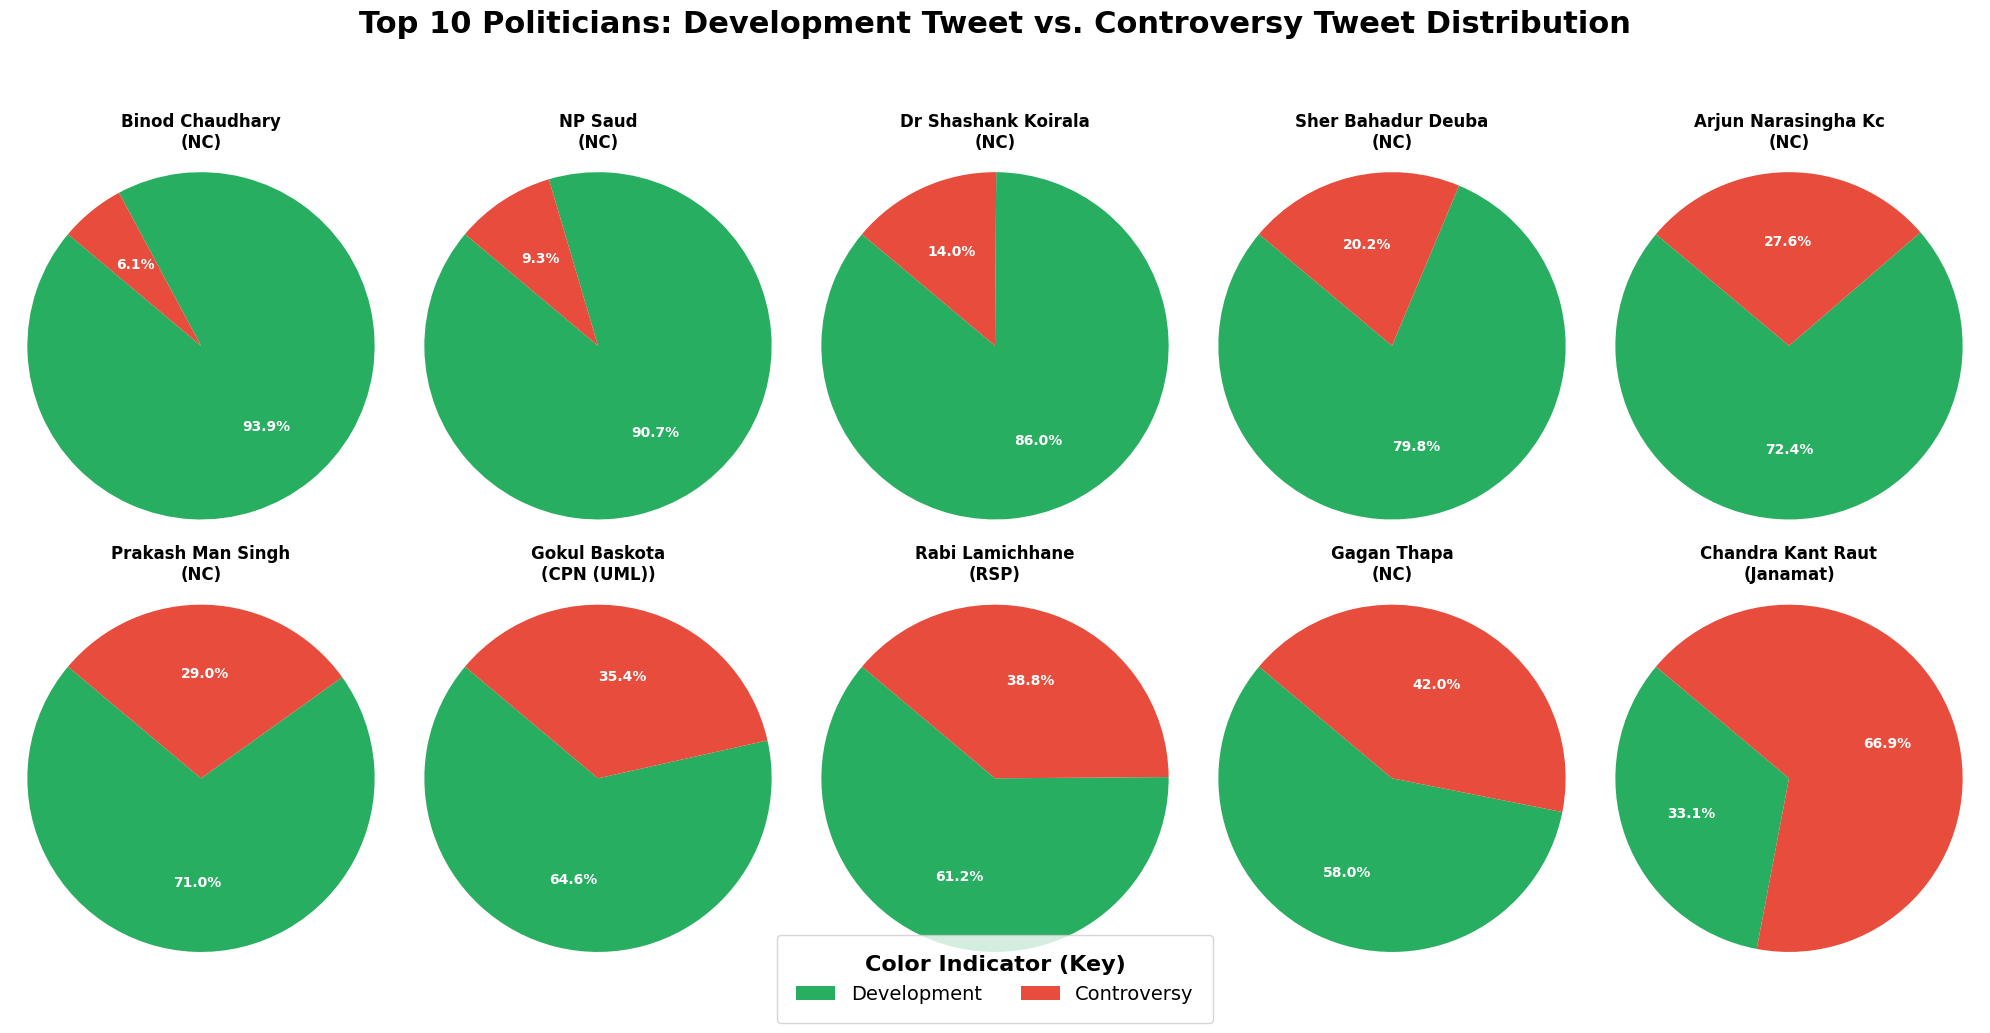

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset directly from the file
# Ensure the file path matches your environment (e.g., 'tweets_classified (5).xlsx')
df = pd.read_excel('/content/tweets_classified (6).xlsx')

# 2. Identify Top 10 politicians by total tweet volume
top_leaders_df = df.groupby(['name', 'party']).size().reset_index(name='total_volume')
top_10_leaders = top_leaders_df.sort_values('total_volume', ascending=False).head(10)

# 3. Calculate the category distribution for these top leaders
# Note: 'Political' label in the dataset corresponds to Controversy
pivot_df = df[df['name'].isin(top_10_leaders['name'])].groupby(['name', 'category_label']).size().unstack(fill_value=0)

# 4. Prepare data for sorting and plotting
plot_data = []
for name in top_10_leaders['name']:
    party = top_10_leaders[top_10_leaders['name'] == name]['party'].values[0]
    dev_count = pivot_df.loc[name, 'Development'] if 'Development' in pivot_df.columns else 0
    con_count = pivot_df.loc[name, 'Political'] if 'Political' in pivot_df.columns else 0
    total = dev_count + con_count

    if total > 0:
        dev_pct = (dev_count / total) * 100
        con_pct = (con_count / total) * 100
        plot_data.append((name, party, dev_pct, con_pct))

# 5. SORTING: Highest Development Percentage to Lowest
top_10_sorted = sorted(plot_data, key=lambda x: x[2], reverse=True)

# 6. Plotting the 2x5 grid
colors = ['#27ae60', '#e74c3c']
labels = ['Development', 'Controversy']

fig, axes = plt.subplots(2, 5, figsize=(20, 11))
axes = axes.flatten()
patches = []

for i, (name, party, dev_pct, con_pct) in enumerate(top_10_sorted):
    ax = axes[i]
    sizes = [dev_pct, con_pct]

    wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140,
                                      textprops={'color': 'white', 'fontweight': 'bold'})

    if i == 0:
        patches = wedges

    ax.set_title(f"{name}\n({party})", fontsize=12, fontweight='bold', pad=10)
    ax.axis('equal')

# Shared Indicator (Legend) for Color Mapping
fig.legend(patches, labels, title="Color Indicator (Key)", loc='lower center',
           bbox_to_anchor=(0.5, 0.05), ncol=2, frameon=True, fontsize=14,
           title_fontproperties={'weight': 'bold', 'size': 16}, borderpad=1)

plt.suptitle("Top 10 Politicians: Development Tweet vs. Controversy Tweet Distribution",
             fontsize=22, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0.1, 1, 0.94])
plt.show()

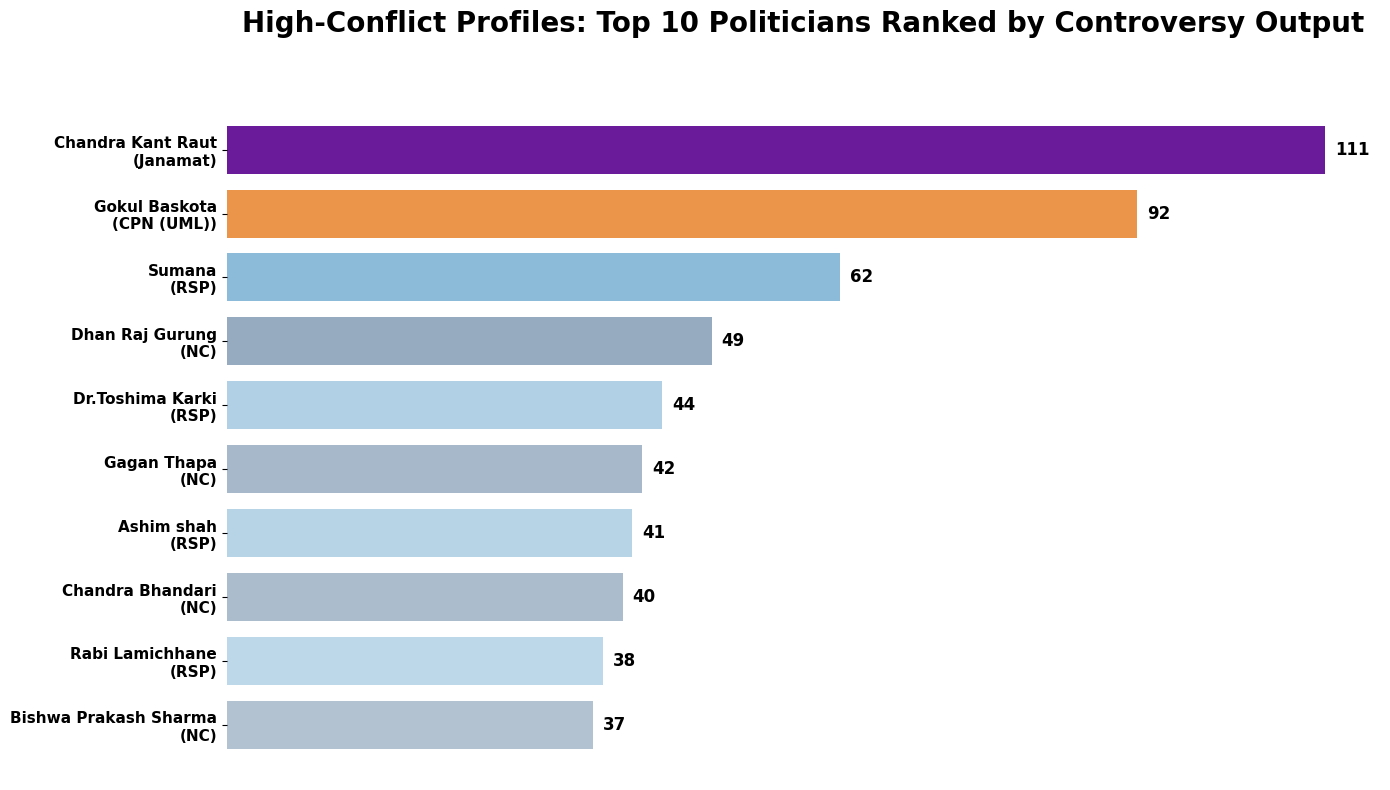

In [46]:
# Analysis
# Ensure 'Political' category label is changed to 'Controversy' for consistency
df['category_label'] = df['category_label'].replace({'Political': 'Controversy'})

con_data = df[df['category_label'] == 'Controversy'].groupby(['name', 'party']).size().reset_index(name='v').sort_values('v', ascending=False).head(10)
min_v, max_v = con_data['v'].min(), con_data['v'].max()

fig, ax = plt.subplots(figsize=(14, 8))
bar_colors = [get_gradient_color(p, v, min_v, max_v) for p, v in zip(con_data['party'], con_data['v'])]
bars = ax.barh(range(len(con_data)), con_data['v'], color=bar_colors, height=0.75)

apply_floating_style(ax, 'High-Conflict Profiles: Top 10 Politicians Ranked by Controversy Output')
ax.set_yticks(range(len(con_data)))
ax.set_yticklabels([f"{n}\n({p})" for n, p in zip(con_data['name'], con_data['party'])], fontweight='bold', fontsize=11)

# Annotate values
for bar in bars:
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, int(bar.get_width()), va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

In [48]:
import pandas as pd

# 1. Load the classified dataset
df = pd.read_excel('/content/tweets_classified (6).xlsx')

# 2. Group by leader and party to aggregate counts
leader_stats = df.groupby(['name', 'party']).agg({
    'tweet_id': 'count',
    'category_label': lambda x: (x == 'Development').sum()
}).rename(columns={
    'tweet_id': 'total_tweets',
    'category_label': 'development_tweets'
})

# 3. Calculate the Development Percentage
leader_stats['development_percent'] = (
    leader_stats['development_tweets'] / leader_stats['total_tweets'] * 100
).round(2)

# 4. Sort by the highest development focus
top_development_leaders = leader_stats.sort_values(
    by='development_percent',
    ascending=False
).reset_index()

# 5. Display the Top 10 Development-Oriented Leaders with total counts
print("Top 10 Politicians Ranked by Development Focus Percentage and Volume:")
print(top_development_leaders[['name', 'party', 'total_tweets', 'development_percent']].head(10))

Top 10 Politicians Ranked by Development Focus Percentage and Volume:
                    name      party  total_tweets  development_percent
0      Bhanubhakta Joshi   CPN (SC)             2               100.00
1        Binod Chaudhary         NC            99                93.94
2                NP Saud         NC           118                90.68
3   Dr. Prakash S. Mahat         NC            96                88.54
4         K P Sharma Oli  CPN (UML)            63                87.30
5    Dr Shashank Koirala         NC           100                86.00
6          Bishnu Paudel  CPN (UML)            67                82.09
7     Sher Bahadur Deuba         NC            99                79.80
8  Biraj Bhakta Shrestha        RSP            92                79.35
9              Prachanda    CPN(MC)            91                79.12


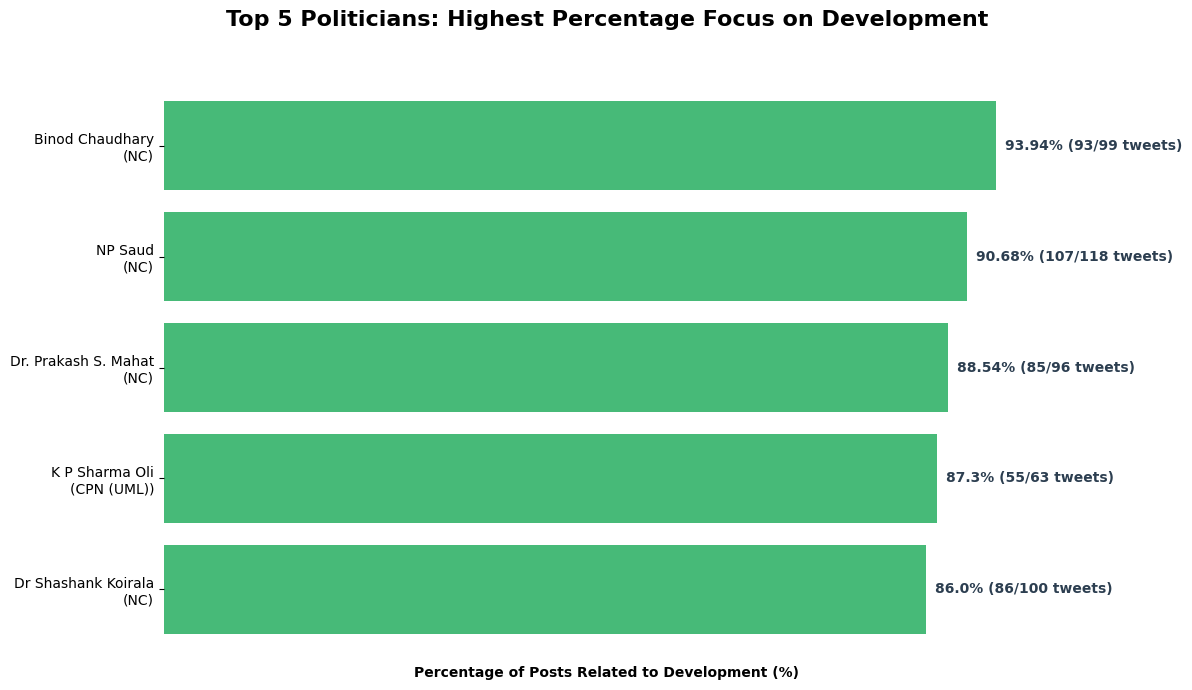


Top 5 Development-Focused Leaders:
                    name      party  total_tweets  development_tweets  \
7        Binod Chaudhary         NC            99                  93   
27               NP Saud         NC           118                 107   
16  Dr. Prakash S. Mahat         NC            96                  85   
21        K P Sharma Oli  CPN (UML)            63                  55   
15   Dr Shashank Koirala         NC           100                  86   

    development_percent  
7                 93.94  
27                90.68  
16                88.54  
21                87.30  
15                86.00  


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the classified dataset
df = pd.read_excel('/content/tweets_classified (6).xlsx')

# Ensure 'Political' category label is changed to 'Controversy' for consistency
df['category_label'] = df['category_label'].replace({'Political': 'Controversy'})

# 2. Group by leader and party to aggregate counts
leader_stats = df.groupby(['name', 'party']).agg(
    total_tweets=('category_label', 'count'),
    development_tweets=('category_label', lambda x: (x == 'Development').sum())
).reset_index()

# 3. Calculate the Development Percentage
leader_stats['development_percent'] = (
    leader_stats['development_tweets'] / leader_stats['total_tweets'] * 100
).round(2)

# 4. Filter for leaders with at least 10 tweets to avoid skewed percentages from very low tweet counts,
#    and sort by development percentage to get the top 5.
top_5_development_focused = leader_stats[leader_stats['total_tweets'] >= 10].sort_values(
    by='development_percent',
    ascending=False
).head(5)

# 5. Visualization: Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(12, 7))
dev_color = '#27ae60'  # Professional Green for Development

# Prepare data for plotting
names = [f"{row.name}\n({row.party})" for row in top_5_development_focused.itertuples()]
percentages = top_5_development_focused['development_percent'].tolist()
vols = top_5_development_focused['development_tweets'].tolist()
totals = top_5_development_focused['total_tweets'].tolist()

bars = ax.barh(names, percentages, color=dev_color, alpha=0.85)

# Styling and labels
ax.set_title('Top 5 Politicians: Highest Percentage Focus on Development', fontsize=16, fontweight='bold', pad=35)
ax.set_xlabel('Percentage of Posts Related to Development (%)', fontweight='bold')
ax.invert_yaxis()  # Highest percentage at the top
ax.set_xlim(0, 100) # Percentage from 0 to 100

# Add text labels for Volume and Percentage
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width}% ({vols[i]}/{totals[i]} tweets)',
            va='center', fontweight='bold', color='#2c3e50')

# Clean up chart spines
for s in ax.spines.values():
    s.set_visible(False)
ax.set_xticks([])

plt.tight_layout()
plt.show()

print("\nTop 5 Development-Focused Leaders:")
print(top_5_development_focused[['name', 'party', 'total_tweets', 'development_tweets', 'development_percent']])

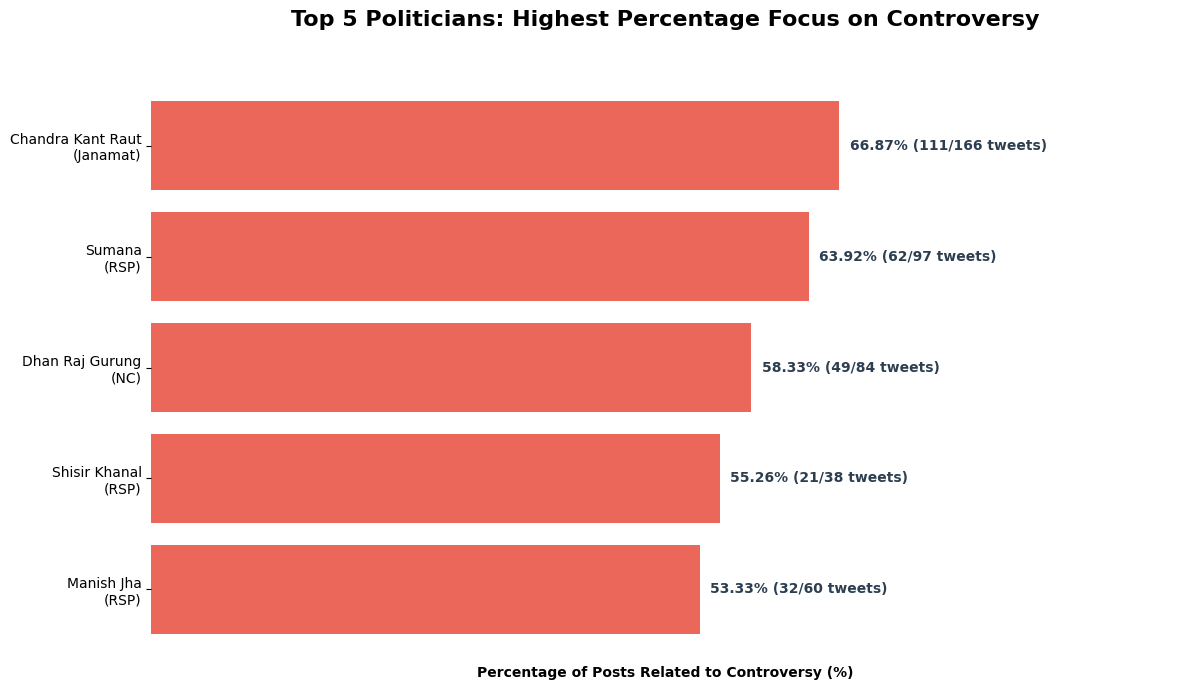

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the classified dataset
df = pd.read_excel('/content/tweets_classified (6).xlsx') # Changed to pd.read_excel

# Ensure 'Political' category label is changed to 'Controversy' for consistency
df['category_label'] = df['category_label'].replace({'Political': 'Controversy'})

# 2. Aggregate data by name and party
# We count total tweets and those labeled 'Political' (Controversy)
leader_stats = df.groupby(['name', 'party']).agg(
    total_tweets=('category_label', 'count'),
    controversy_tweets=('category_label', lambda x: (x == 'Controversy').sum())
).reset_index()

# 3. Calculate Controversy Percentage
leader_stats['controversy_percent'] = (leader_stats['controversy_tweets'] / leader_stats['total_tweets'] * 100).round(2)

# 4. Filter for leaders with at least 10 tweets and sort by percentage focus
top_5_mostly_controversy = leader_stats[leader_stats['total_tweets'] >= 10].sort_values(
    by='controversy_percent',
    ascending=False
).head(5)

# 5. Visualization: Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(12, 7))
con_color = '#e74c3c'  # Professional Red for Controversy

# Formatting labels for the Y-axis
names = [f"{row.name}\n({row.party})" for row in top_5_mostly_controversy.itertuples()]
percentages = top_5_mostly_controversy['controversy_percent'].tolist()
vols = top_5_mostly_controversy['controversy_tweets'].tolist()
totals = top_5_mostly_controversy['total_tweets'].tolist()

bars = ax.barh(names, percentages, color=con_color, alpha=0.85)

# Styling and labels
ax.set_title('Top 5 Politicians: Highest Percentage Focus on Controversy', fontsize=16, fontweight='bold', pad=35)
ax.set_xlabel('Percentage of Posts Related to Controversy (%)', fontweight='bold')
ax.invert_yaxis()  # Highest percentage at the top
ax.set_xlim(0, 100)

# Add text labels for Volume and Percentage inside/outside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width}% ({vols[i]}/{totals[i]} tweets)',
            va='center', fontweight='bold', color='#2c3e50')

# Clean up chart spines
for s in ax.spines.values():
    s.set_visible(False)
ax.set_xticks([])

plt.tight_layout()
plt.show()

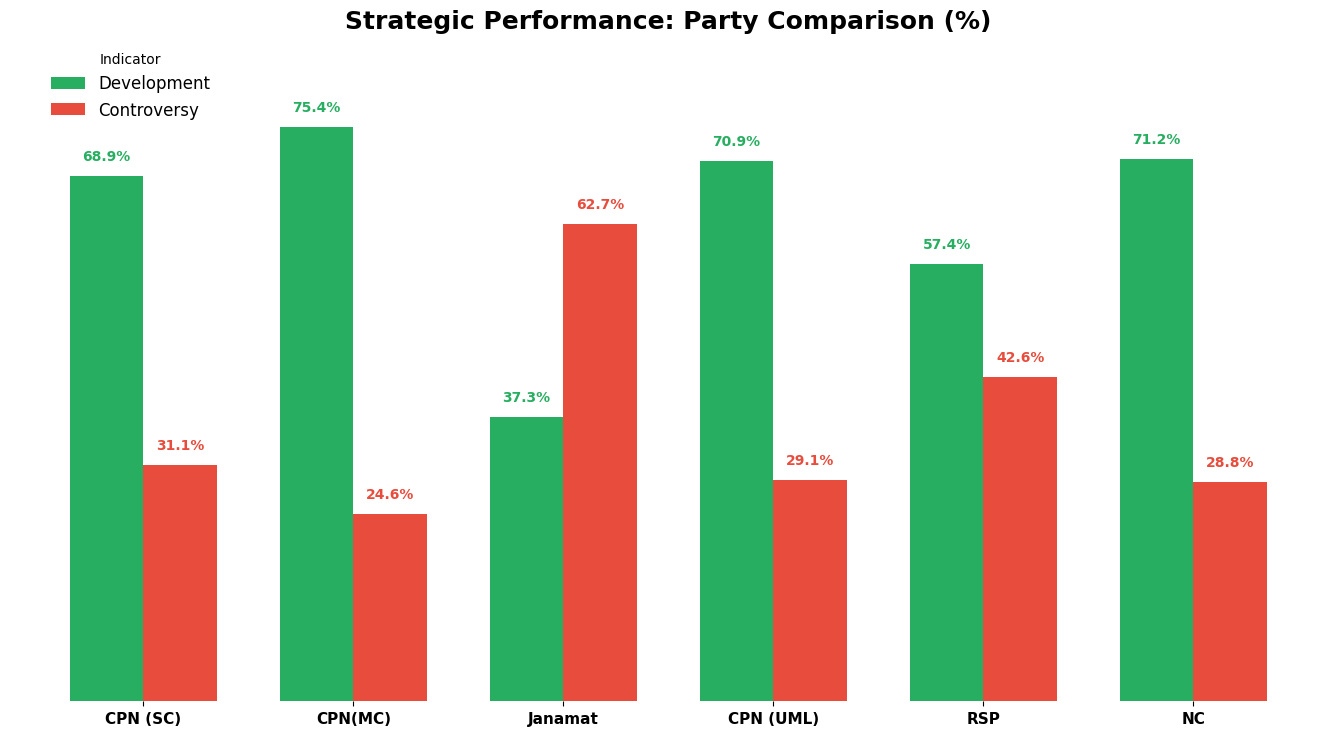

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Uniform Category Colors
TOPIC_THEME = {
    'Development': '#27ae60', # Professional Green
    'Controversy': '#e74c3c'  # Professional Red
}

# Ensure 'Controversy' label is present for consistent plotting
df['category_label'] = df['category_label'].replace({'Political': 'Controversy'})

# 1. Aggregate and calculate percentages
party_stats = df.groupby(['party', 'category_label']).size().unstack(fill_value=0)
party_stats['total'] = party_stats.sum(axis=1)

# 2. SORTING IN ASCENDING ORDER based on total volume
party_stats = party_stats.sort_values('total', ascending=True)

# 3. Calculate percentages
party_stats['Dev_Pct'] = (party_stats['Development'] / party_stats['total']) * 100
party_stats['Con_Pct'] = (party_stats['Controversy'] / party_stats['total']) * 100

# 4. Plotting
fig, ax = plt.subplots(figsize=(14, 8))
x = range(len(party_stats))
width = 0.35

# Plotting bars
ax.bar([i - width/2 for i in x], party_stats['Dev_Pct'], width, label='Development', color=TOPIC_THEME['Development'])
ax.bar([i + width/2 for i in x], party_stats['Con_Pct'], width, label='Controversy', color=TOPIC_THEME['Controversy'])

# 5. Formatting labels and Legend (Indicator)
ax.set_xticks(x)
ax.set_xticklabels(party_stats.index, fontweight='bold', fontsize=11)
ax.set_title('Strategic Performance: Party Comparison (%)',
             fontsize=18, fontweight='bold', pad=50)

# FIX: Anchor legend outside the immediate plot area to prevent overlap with the first bar
ax.legend(title="Indicator", loc='upper left', frameon=False, fontsize=12, bbox_to_anchor=(0.02, 1.1))

# 6. FIX: Increased padding for percentage labels (d + 2) to prevent bar-top overlap
for i, (d, c) in enumerate(zip(party_stats['Dev_Pct'], party_stats['Con_Pct'])):
    ax.text(i - width/2, d + 2, f"{d:.1f}%", ha='center', fontweight='bold', color=TOPIC_THEME['Development'])
    ax.text(i + width/2, c + 2, f"{c:.1f}%", ha='center', fontweight='bold', color=TOPIC_THEME['Controversy'])

# Clean up layout
for s in ax.spines.values():
    s.set_visible(False)
ax.set_yticks([])

# FIX: Added subplots_adjust and increased pad to prevent title/legend clipping
plt.tight_layout(pad=3.0)
plt.show()